# Setup
### Imports, wipe working directories, reload .py scripts

In [22]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [23]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data
from lib import analysis

%matplotlib inline

In [24]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "pl"

In [25]:
importlib.reload(import_data)
importlib.reload(analysis)

<module 'lib.analysis' from '/home/tomas/Documents/sciencetools_py/lib/analysis.py'>

## MAPbI Data Import

***

### Data structure:

uv_data
 - Run ID (etb0XX)
     - Sample ID ('1min')
          - wavelength
          - counts

***

### Run -> Sample Correspondence
|ETB-043|ETB-044|
|---|---|
|20min|1min|
|40min|2min|
|60min|5min|
|80min|10min|
|100min|15min|
|120min|20min|

In [26]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
pl_data = {}
# ETB-046 Variables
samples_dir = {
    "etb046": "190904 ETB-046 MAPbI FF/",
    "etb047": "190902 ETB-047 MAPbI FF/",
    "etb048": "190904 ETB-048 MAPbI FF/",
}

for run_ID in samples_dir:
    pl_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

cypher_etb046 = (
    "30sec",
    "1min",
    "1min_1",
    "2min",
    "3min",
    "3min_1",
    "5min",
    "20min",
)

cypher_etb047 = (
    "10min-1",
    "40min-1",
    "60min",
    "60min-1",
    "60min-point1",
    "80min-1",
    "100min",
    "100min-1percent",
    "120min-1percent",
    "120min-point1percent",
    "120min-point1percent_1",
)

cypher_etb048 = (
    "4min",
    "15min",
)

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


/home/tomas/Documents/sciencetools_py/lib/analysis.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  # Check for halfpoint to the left of max
/home/tomas/Documents/sciencetools_py/lib/analysis.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
  current_index = max_location.index
/home/tomas/Documents/sciencetools_py/lib/analysis.py:27: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/home/tomas/Documents/sciencetools_py/lib/analysis.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
  


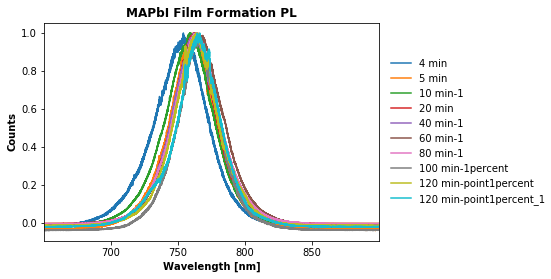

In [27]:
fig = plt.figure(1)
fig_ax = plt.gca()

master_cypher = (
#     "30sec",
#     "1min",
#     "1min_1",
#     "2min",
#     "3min",
#     "3min_1",
    "4min",
    "5min",
    "10min-1",
    "20min",
    "40min-1",
#     "60min",
    "60min-1",
#     "60min-point1",
    "80min-1",
#     "100min",
    "100min-1percent",
#     "120min-1percent",
    "120min-point1percent",
    "120min-point1percent_1",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
            raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))

            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"]/
                     abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=sample_ID.replace("min", " min"))
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
# fig_ax.set_yticklabels([])
plt.xlim(min(pl_data["etb046"]["1min"]["wavelength"]), max(pl_data["etb046"]["1min"]["wavelength"]))

plt.title("MAPbI Film Formation PL",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.5,1),mode='expand', frameon=False)

In [ ]:
fig.savefig("plots/190912/PL_all_stacked_norm.png", dpi=200, format='png', bbox_inches='tight')

In [30]:
max_values.to_csv('./plots/191031/mapbi.xlsx')

## MAPbBr Data Import

***

### Data structure:

uv_data
 - Run ID (etb0XX)
     - Sample ID ('1min')
          - wavelength
          - counts

***

### Run -> Sample Correspondence
|ETB-049|ETB-0XX|
|---|---|
|1min|Xmin|
|2min|Xmin|
|3min|Xmin|
|5min|Xmin|
|10min|Xmin|
|30sec|Xmin|

In [5]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
pl_data = {}

# MAPbBr Data Dict
samples_dir = {
    "etb049": "190911 ETB-049 MAPbBr FF/",
    "etb050": "191031 ETB-050 MAPbBr FF/",
    "etb051": "191031 ETB-051 MAPbBr FF/",
}

for run_ID in samples_dir:
    pl_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

cypher_etb046 = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)


Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


/home/tomas/Documents/sciencetools_py/lib/analysis.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  # Check for halfpoint to the left of max
/home/tomas/Documents/sciencetools_py/lib/analysis.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
  current_index = max_location.index
/home/tomas/Documents/sciencetools_py/lib/analysis.py:27: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/home/tomas/Documents/sciencetools_py/lib/analysis.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
  


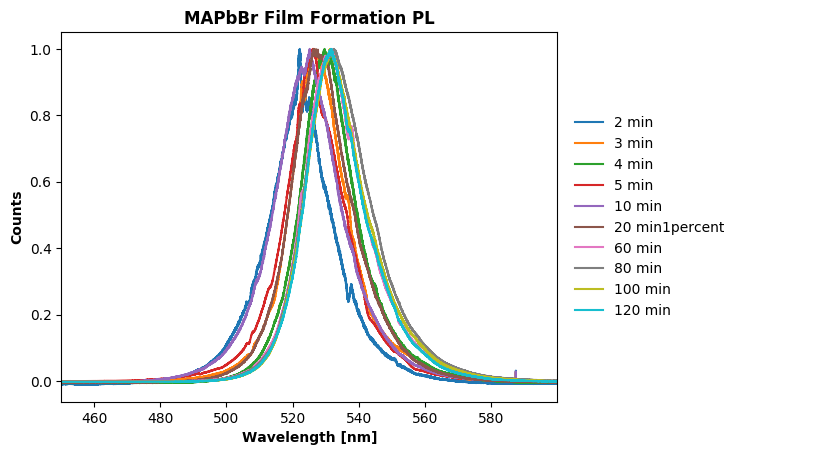

In [15]:
importlib.reload(analysis)

fig = plt.figure(1)
fig_ax = plt.gca()

master_cypher = (
#     "30sec",
#     "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "20min1percent",
    "60min",
    "80min",
    "100min",
    "120min",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
            
            raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"]/
                     pl_data[run_ID][sample_ID]["counts"].max(),
                     label=sample_ID.replace("min", " min"))
        else:
            pass
        
max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])
        
plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
# fig_ax.set_yticklabels([])
plt.xlim(min(pl_data["etb049"]["1min"]["wavelength"]), max(pl_data["etb049"]["1min"]["wavelength"]))

plt.title("MAPbBr Film Formation PL",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.5,1),mode='expand', frameon=False)

plt.show()

In [25]:
fig.savefig("plots/191031/PL_all_stacked_norm.png", dpi=200, format='png', bbox_inches='tight')

In [21]:
max_values.to_csv("./plots/191031/mapbbr.xlsx")